most_nuc():找最多RNA序列，输出[[最多的几个nuc],{记录所有nuc个数的字典}]就是[[列表],dic]
list(most_nuc(se)[1].keys()):所有的nuc的名字
most_nuc(se)[1].values()：所有nuc对应的频率
trans():nuc转换ami
most_ami():[最多的几个nuc]的转换（trans()）
all_ami():dic的key值(是nuc)转换成ami

思路：
task1:
AUG起始位置
多个相同频率的nuc


task3:
step n:plt.bar(most_ami(se),most_nuc(se)[1].values())转为plt.bar(all_ami(list(most_nuc(se)[1].keys())),most_nuc(se)[1].values())

Task1

In [54]:
def most_nuc(a):#what if it has the same number/has two AUG:start
    dic={}
    start=[]#
    for i in range(len(a)-2):
        if a[i:i+3]=="AUG":
            start.append(i)#
    if start==[]:#
        return "NotFound1"
    j=0#记录前一个密码子结束的地点，如果它的位置在这个开始密码子后面或者两个A重合，这个密码子不算(除了i==0的情况)
    for k in range(len(start)):#
        i=start[k]#取每一个密码子开始位置 
        if j>=i and i!=0:
            continue
        while a[i:i+3] not in ["UAA","UAG","UGA"] and i+3<=len(a):
            if a[i: i+3] in dic:
                dic[a[i:i+3]]+=1
            else:
                dic[a[i:i+3]]=1
            i+=3
        j=i+3
    if dic=={}:
        return "NotFound2"
    m=max(dic.values())#可以先找出字典中的最大值，再一次性找出所有值等于最大值的键，这样代码逻辑更清晰
    q=[key for key,value in dic.items() if value==m]
    return q,dic
se="AUGATGCGAAGCGGTAATAGTGGCAGTTGTAACCATTTTCTAGTCTTTCTCCGTAAAGTAGTTACTTGCCACAATGCCGCCATAGTGCGGAAAACAACGAAATATAATTCCTTGAAGCACAAAACGCCACCCCTTCCCCTTGCCCTTGCCCTTGCGGACGCCCTTTCCCCTCAAAATTTTTTTCATATTACGTCTCCGGCTTCGCTCTCTTACTCTTGGCGCCGGGCGGACCCCGGCAGGAAGGGGAGAACCCAGCCCCTTCCTACTCAAGGCTCTGCGCGGCGTTTTCTCCACACCCCACAGGGCGGGGTAGAGCCGTGCCGGGTGATACACATCATCACATCCTATATGAAATCTATATCATATCACATTGGTATACATAGTACAAAGGAAGAAAAAAATTGTAATCATTAA"
print(most_nuc(se))

(['AAT', 'AAA', 'CTT'], {'AUG': 1, 'ATG': 2, 'CGA': 1, 'AGC': 1, 'GGT': 2, 'AAT': 6, 'AGT': 3, 'GGC': 4, 'TGT': 2, 'AAC': 1, 'CAT': 4, 'TTT': 5, 'CTA': 1, 'GTC': 1, 'CTC': 3, 'CGT': 2, 'AAA': 6, 'GTA': 2, 'GTT': 1, 'ACT': 2, 'TGC': 2, 'CAC': 5, 'GCC': 5, 'ATA': 4, 'GTG': 2, 'CGG': 4, 'ACA': 3, 'ACG': 3, 'TAT': 3, 'TCC': 3, 'TTG': 1, 'AAG': 3, 'CCA': 2, 'CCC': 4, 'CTT': 6, 'GCG': 3, 'GAC': 2, 'CCT': 2, 'CAA': 2, 'ATT': 2, 'TCT': 5, 'CCG': 2, 'GCT': 1, 'TCG': 1, 'TAC': 1, 'TGG': 1, 'CGC': 1, 'AGG': 1, 'GGG': 2, 'AGA': 1, 'ACC': 2, 'CAG': 2, 'GAG': 1, 'ATC': 2, 'TCA': 1, 'GAA': 2, 'TAA': 1})


task2

In [55]:
def trans(a):
     codon_table={'AUG': 'Met','CCG': 'Pro','UUU': 'Phe', 'UUC': 'Phe','UUA': 'Leu', 'UUG': 'Leu', 'CUU': 'Leu', 'CUC': 'Leu', 'CUA': 'Leu', 'CUG': 'Leu','AUU': 'Ile', 
                   'AUC': 'Ile', 'AUA': 'Ile', 'GUU': 'Val', 'GUC': 'Val', 'GUA': 'Val', 'GUG': 'Val','UCU': 'Ser', 'UCC': 'Ser', 'UCA': 'Ser', 'UCG': 'Ser','CCU': 'Pro', 
                   'CCC': 'Pro', 'CCA': 'Pro','ACU': 'Thr', 'ACC': 'Thr', 'ACA': 'Thr', 'ACG': 'Thr','GCU': 'Ala', 'GCC': 'Ala', 'GCA': 'Ala', 'GCG': 'Ala','UAU': 'Tyr', 
                   'UAC': 'Tyr','CAU': 'His', 'CAC': 'His', 'CAA': 'Gln', 'CAG': 'Gln','AAU': 'Asn', 'AAC': 'Asn','AAA': 'Lys', 'AAG': 'Lys', 'GAU': 'Asp', 'GAC': 'Asp',
                   'GAA': 'Glu', 'GAG': 'Glu','UGU': 'Cys', 'UGC': 'Cys', 'UGG': 'Trp', 'CGU': 'Arg', 'CGC': 'Arg', 'CGA': 'Arg', 'CGG': 'Arg', 'AGA': 'Arg', 'AGG': 'Arg',
                   'GGU': 'Gly', 'GGC': 'Gly', 'GGA': 'Gly', 'GGG': 'Gly'}
     if a not in codon_table.keys():
         return "Error"
     return codon_table[a]
def most_ami(a):
    q=most_nuc(a)[0]
    ami=[]
    for i in range(len(q)):
        ami.append(trans(q[i]))
    return ami
se="AUGATGCGAAGCGGTAATAGTGGCAGTTGTAACCATTTTCTAGTCTTTCTCCGTAAAGTAGTTACTTGCCACAATGCCGCCATAGTGCGGAAAACAACGAAATATAATTCCTTGAAGCACAAAACGCCACCCCTTCCCCTTGCCCTTGCCCTTGCGGACGCCCTTTCCCCTCAAAATTTTTTTCATATTACGTCTCCGGCTTCGCTCTCTTACTCTTGGCGCCGGGCGGACCCCGGCAGGAAGGGGAGAACCCAGCCCCTTCCTACTCAAGGCTCTGCGCGGCGTTTTCTCCACACCCCACAGGGCGGGGTAGAGCCGTGCCGGGTGATACACATCATCACATCCTATATGAAATCTATATCATATCACATTGGTATACATAGTACAAAGGAAGAAAAAAATTGTAATCATTAA"
print(most_ami(se))

['Error', 'Lys', 'Error']


Task3

In [56]:
print(most_nuc(se)[1].values())#dic的值#most_nuc(se)[1]是那个字典

dict_values([1, 2, 1, 1, 2, 6, 3, 4, 2, 1, 4, 5, 1, 1, 3, 2, 6, 2, 1, 2, 2, 5, 5, 4, 2, 4, 3, 3, 3, 3, 1, 3, 2, 4, 6, 3, 2, 2, 2, 2, 5, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1])


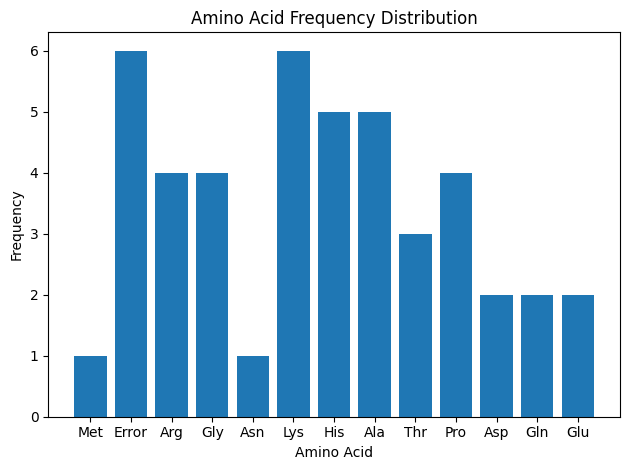

<Figure size 1000x600 with 0 Axes>

In [57]:
def all_ami(a):
    ami=[]
    for i in range(len(a)):#len(most_nuc(se)[1])==len(a)
        ami.append(trans(a[i]))
    return ami
import matplotlib.pyplot as plt

se="AUGATGCGAAGCGGTAATAGTGGCAGTTGTAACCATTTTCTAGTCTTTCTCCGTAAAGTAGTTACTTGCCACAATGCCGCCATAGTGCGGAAAACAACGAAATATAATTCCTTGAAGCACAAAACGCCACCCCTTCCCCTTGCCCTTGCCCTTGCGGACGCCCTTTCCCCTCAAAATTTTTTTCATATTACGTCTCCGGCTTCGCTCTCTTACTCTTGGCGCCGGGCGGACCCCGGCAGGAAGGGGAGAACCCAGCCCCTTCCTACTCAAGGCTCTGCGCGGCGTTTTCTCCACACCCCACAGGGCGGGGTAGAGCCGTGCCGGGTGATACACATCATCACATCCTATATGAAATCTATATCATATCACATTGGTATACATAGTACAAAGGAAGAAAAAAATTGTAATCATTAA"
plt.title('Amino Acid Frequency Distribution')
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.bar(all_ami(list(most_nuc(se)[1].keys())),most_nuc(se)[1].values())
plt.tight_layout()
plt.figure(figsize=(10,6))
plt.show()

随机突变
带电荷不带电荷统计

Marking criteria
学姐说：最好是可以展示出你们小组独有的一些想法和特色，会比较受到老师的欣赏。

task的code不要重复体现teamwork
task 4要有bio significance
我们去问点想法他怎么看
基因突变预测疾病风险

展示代码片段和python可视化

visual aids for figures/poster
